# Q: What is the Highest Grossing Movie With The Least Production Cost?

In [185]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [186]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [187]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df


In [188]:
#End of importing files and libraries

In [189]:
# create dataframes out of each file
title_crew_df = csv_files_dict['imdb_title_crew_gz']
movies_df = csv_files_dict['tmdb_movies_gz']
title_akas_df = csv_files_dict['imdb_title_akas_gz']
title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
name_basics_df = csv_files_dict['imdb_name_basics_gz']
title_basics_df = csv_files_dict['imdb_title_basics_gz']
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
movie_gross_df = csv_files_dict['bom_movie_gross_gz']
title_principals_df = csv_files_dict['imdb_title_principals_gz']

In [190]:
#turn movie budgets file into a dataframe and find out it's type
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
type(movie_budgets_df)

pandas.core.frame.DataFrame

In [191]:
#find out how many rows and columns in the file
movie_budgets_df.shape

(5782, 5)

In [192]:
#look at the first five rows of the dataframe
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [193]:
#find out information to clean the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


## Data Cleaning

### Dealing with datatypes

In [194]:
#drop the column without having to reasign the df
movie_budgets_df.drop('worldwide_gross', axis=1, inplace=True)
movie_budgets_df.head()  #check to see if the column is dropped 

,release_date,movie,production_budget,domestic_gross
id,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"


In [195]:
#confirming no na values
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
dtype: int64

In [196]:
#changing dtype of columns
#we want to change the types of 3 columns. 

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [197]:
#making a list of all the cols where we want to change the dtype 
money_cols = ['production_budget', 'domestic_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [198]:
# check to see if type was changed to int
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 225.9+ KB


In [199]:
#? How do I set up data to compare 
#highest grossing of the lowest production cost

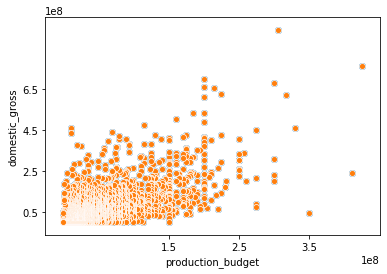

In [200]:
df = movie_budgets_df
plt.scatter(df['production_budget'],df['domestic_gross'])
ax = sns.scatterplot(x="production_budget", y="domestic_gross", data=df)
ax.set(xticks=np.arange(1.5E8, 4E8, 1E8),
      yticks=np.arange(0.5E8, 7E8, 2E8))
plt.show()

In [201]:
narrow_prod_budget_df = df[(df['production_budget'] >= 1.8E8) & 
                           (df['production_budget'] <= 2.2E8)]
narrow_prod_budget_df.info()
narrow_prod_budget_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 31 to 90
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       60 non-null     object
 1   movie              60 non-null     object
 2   production_budget  60 non-null     int64 
 3   domestic_gross     60 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


,release_date,movie,production_budget,domestic_gross
id,,,,
31,"Jul 3, 2012",The Amazing Spider-Man,220000000,262030663
32,"May 18, 2012",Battleship,220000000,65233400
33,"Jun 21, 2017",Transformers: The Last Knight,217000000,130168683
34,"Jun 12, 2015",Jurassic World,215000000,652270625
35,"May 25, 2012",Men in Black 3,215000000,179020854
36,"Jun 24, 2009",Transformers: Revenge of the Fallen,210000000,402111870
37,"Jun 27, 2014",Transformers: Age of Extinction,210000000,245439076
38,"May 26, 2006",X-Men: The Last Stand,210000000,234362462
39,"May 14, 2010",Robin Hood,210000000,105487148


## Split Up Genres

### Bring in the title_basics Data Frame 

In [202]:
title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [203]:
title_basics_df.shape

(146144, 5)

In [204]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [205]:
#drop rows where data is missing
cleanedTB = title_basics_df.dropna()
cleanedTB

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary


In [206]:
#check the counts after rows dropped
cleanedTB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, tt0063540 to tt9916538
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    112232 non-null  object 
 1   original_title   112232 non-null  object 
 2   start_year       112232 non-null  int64  
 3   runtime_minutes  112232 non-null  float64
 4   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [208]:
title_basics_df['genres'] = title_basics_df['genres'].apply(lambda x: 
                                                            x.split(",") 
                                                            if x else x)
title_basics_df.head()

AttributeError: 'float' object has no attribute 'split'

In [ ]:
#making a set of all genres we have. set doesn't allow duplicate values

all_genres = set()
for genres in cleanedTB['genres']:
    if genres:
        all_genres.update(genres)

In [ ]:
#show all the genres
all_genres